# The Scalar 1-Loop, 3-Point Vertex Function at Finite Temperature

## Imports and Symbol Declarations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import expand, I, im, symbols, re

import correlator as corr

In [2]:
eps = symbols("eps")

## Generate Data

### Generate Correlator (i.e., Pi) Data 

In [115]:
qq_grid = np.arange(-8, 1)
masses = 1, 2, 3
beta_grid = np.array([0.1, 0.3, 1, 3])
n_max = 6
n_grid = np.arange(-n_max, n_max + 1)

In [116]:
finite_temp_data_Pi =\
    np.array([[[corr.finite_temp_term(*corr.p1_p2(qq),*masses, beta, n) for n in n_grid] for qq in qq_grid] for beta in beta_grid])

### Transform Correlator (i.e., Pi) Data to Vertex Function (i.e., Gamma) Data

In [117]:
finite_temp_data_Gamma = np.zeros(finite_temp_data_Pi.size, dtype="complex128").reshape(finite_temp_data_Pi.shape)
finite_temp_data_re_Gamma = np.zeros(finite_temp_data_Gamma.size, dtype="float64").reshape(finite_temp_data_Gamma.shape)
finite_temp_data_im_Gamma = np.copy(finite_temp_data_re_Gamma)
floors, rows, cols = finite_temp_data_Gamma.shape
for f in range(floors):
    for r in range(rows):
        for c in range(cols):
            finite_temp_data_Gamma[f, r, c] = expand(I * finite_temp_data_Pi[f, r, c].subs("eps", 0))
            finite_temp_data_re_Gamma[f, r, c] = re(finite_temp_data_Gamma[f, r, c])
            finite_temp_data_im_Gamma[f, r, c] = im(finite_temp_data_Gamma[f, r, c])

In [120]:
floors, rows, cols

(4, 9, 13)

### Generate Sequences of Partial Sums

In [121]:
# cols is an odd, positive integer
partial_sums_Gamma = np.zeros(floors * rows * ((cols + 1) // 2), dtype="complex128").reshape(floors, rows, (cols + 1) // 2)
partial_sums_re_Gamma = np.zeros(partial_sums_Gamma.size).reshape(partial_sums_Gamma.shape)
partial_sums_im_Gamma = np.copy(partial_sums_re_Gamma)
for f in range(floors):
    partial_sums_Gamma[f, :, 0] = finite_temp_data_Gamma[f, :, n_max]
    partial_sums_re_Gamma[f, :, 0] = np.array([re(x) for x in partial_sums_Gamma[f, :, 0]])
    partial_sums_im_Gamma[f, :, 0] = np.array([im(x) for x in partial_sums_Gamma[f, :, 0]])
    for c in range(1, partial_sums_Gamma.shape[2]):
        partial_sums_Gamma[f, :, c] = partial_sums_Gamma[f, :, c - 1]\
            + finite_temp_data_Gamma[f, :, n_max - c] + finite_temp_data_Gamma[f, :, n_max + c]
        partial_sums_re_Gamma[f, :, c] = np.array([re(x) for x in partial_sums_Gamma[f, :, c]])
        partial_sums_im_Gamma[f, :, c] = np.array([im(x) for x in partial_sums_Gamma[f, :, c]])

## Plots

In [172]:
plt.rc('font', size=12)

In [147]:
def select_indices(arr, num_indices):
    index_step = int(np.ceil(len(arr) / num_indices))
    return np.arange(0, len(qq_grid), index_step)

num_plots = 5
qq_indices = select_indices(qq_grid, num_plots)
print(qq_indices)

[0 2 4 6 8]


### Sequence Plots

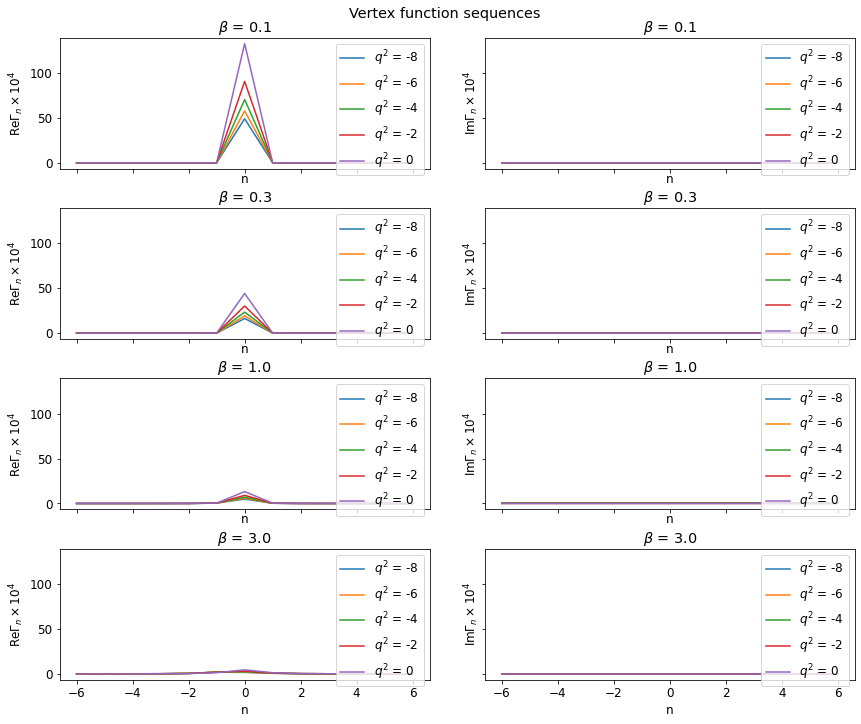

In [180]:

fig, ax = plt.subplots(nrows=len(beta_grid), ncols=2, sharex=True, sharey=True, figsize=(12, 10))
fig.suptitle(r"Vertex function sequences")
fig.tight_layout()
fig.subplots_adjust(wspace=0.15, hspace=0.3)
for f in range(floors):
    for r in qq_indices:
        ax[f, 0].plot(n_grid, 1e4 * finite_temp_data_re_Gamma[f, r, :], label=r"$q^2$ = {}".format(qq_grid[r]))
        ax[f, 1].plot(n_grid, 1e4 * finite_temp_data_im_Gamma[f, r, :], label=r"$q^2$ = {}".format(qq_grid[r]))
        ax[f, 0].set_ylabel(r"$\mathrm{Re}\Gamma_n \times 10^4$")
        ax[f, 1].set_ylabel(r"$\mathrm{Im}\Gamma_n \times 10^4$")
        for re_im in range(2):
            ax[f, re_im].set_title(r"$\beta$ = {}".format(beta_grid[f]))
            ax[f, re_im].legend(loc="upper right")
            ax[f, re_im].set_xlabel("n")

### Partial Sums Plots

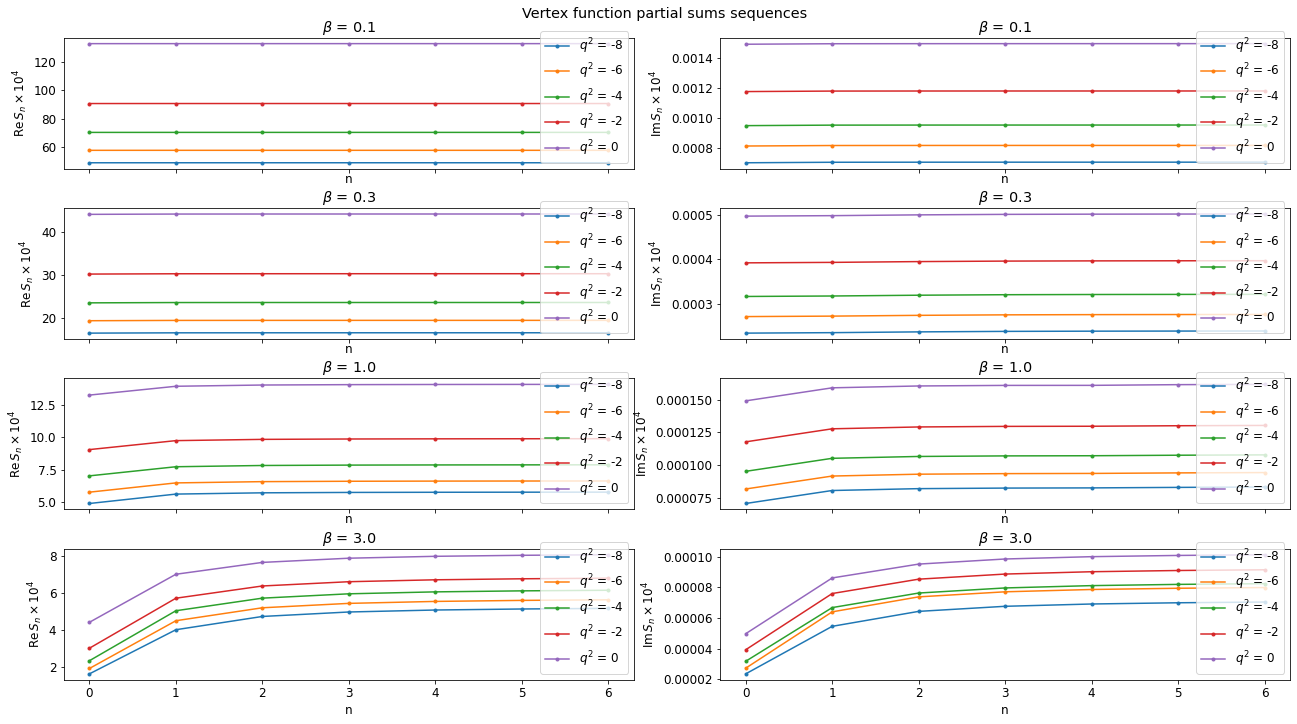

In [183]:

fig, ax = plt.subplots(nrows=len(beta_grid), ncols=2, figsize=(18, 10), sharex=True, sharey=False)
fig.suptitle(r"Vertex function partial sums sequences")
fig.tight_layout()
fig.subplots_adjust(wspace=0.15, hspace=0.3)
for f in range(floors):
    for r in qq_indices:
        ax[f, 0].plot(n_grid[n_max:], 1e4 * partial_sums_re_Gamma[f, r, :], label=r"$q^2$ = {}".format(qq_grid[r]), marker=".")
        ax[f, 1].plot(n_grid[n_max:], 1e4 * partial_sums_im_Gamma[f, r, :], label=r"$q^2$ = {}".format(qq_grid[r]), marker=".")
        ax[f, 0].set_ylabel(r"$\mathrm{Re}\,S_n \times 10^4$")
        ax[f, 1].set_ylabel(r"$\mathrm{Im}\,S_n \times 10^4$")
        for re_im in range(2):
            ax[f, re_im].set_title(r"$\beta$ = {}".format(beta_grid[f]))
            ax[f, re_im].legend(loc="lower right")
            ax[f, re_im].set_xlabel("n")

### The Vertex Function

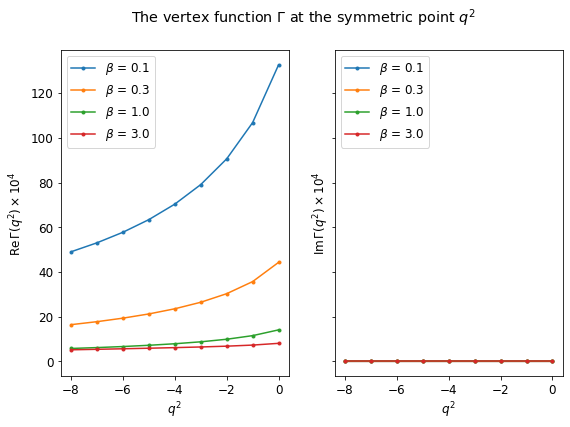

In [184]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(9, 6))
fig.suptitle(r"The vertex function $\Gamma$ at the symmetric point $q^2$")
for f in range(floors):
    ax[0].plot(qq_grid, 1e4 * partial_sums_re_Gamma[f, :, -1], marker=".", label=r"$\beta$ = {}".format(beta_grid[f]))
    ax[1].plot(qq_grid, 1e4 * partial_sums_im_Gamma[f, :, -1], marker=".", label=r"$\beta$ = {}".format(beta_grid[f]))
    ax[0].set_ylabel(r"$\mathrm{Re}\,\Gamma(q^2)\times 10^4$")
    ax[1].set_ylabel(r"$\mathrm{Im}\,\Gamma(q^2)\times 10^4$")
    for re_im in range(2):
        ax[re_im].set_xlabel(r"$q^2$")
        ax[re_im].legend(loc="upper left")